<a href="https://colab.research.google.com/github/sigvehaug/CAS-Applied-Data-Science/blob/master/Module-1/M1-D2-DV-Sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook 2, Module 1, Data Aquisition and Data Management, CAS Applied Data Science, 2021-08-26, S. Haug, University of Bern. 

**First some cells from the discussion session in the morning.**

1. Wenn leaving a colab session, files you have saved locally will disappear. So it is better to use your google drive for files you want to keep. For that you need to mount google drive to the machine were the colab session is running: 

In [9]:
# Using files from google drive
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
#!ls -l drive/MyDrive # listing the files in my google drive

# 1. Visualisation of Data - Examples

**Learning outcomes:**

Participants will be able to make good data science plots, with praxis on 
- plot line charts from series and dataframes
- plot histograms
  - understand the effect of binning
- plot scatter plots
- plot box plots
- plot error bars
- formatting of plots
- geoplotting

**Introduction Slides**
- https://docs.google.com/presentation/d/1HhRIIVq46DyVNm68WeTqr_vZvOgSMWBZa2XDwWNH8H4/edit?usp=sharing

**Further sources**
- Python: https://pandas.pydata.org/pandas-docs/stable/visualization.html
- https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html
- Get inspired here : https://matplotlib.org/gallery/index.html

Here you have examples on plotting possibilities with pandas. They make data science plotting very easy and fast. However, you may have special needs that are not supported. Then you can use the underlaying plotting module **matplotlib**. 

Plotting is an art and you can spend enourmous amounts of time doing plotting. There are many types of plots. You may invent your own type. We only show some examples and point out some important things. If you need to go further, you have to work indepentently. 

Some vocabulary and plots are only understandable with corresponding statistics background. This is part of module 2. 

### 0. Load the modules

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 1. Plot line charts (time series)

First we use the data structure Series (one dimensional).

In [11]:
# Generate 1000 random numbers for 1000 days from the normal distribution
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.head(15)
#ts.plot()
#plt.show()

2000-01-01   -1.025638
2000-01-02   -1.482326
2000-01-03   -0.688202
2000-01-04   -0.280460
2000-01-05   -1.310345
2000-01-06   -1.198430
2000-01-07   -1.609270
2000-01-08   -1.965469
2000-01-09   -2.701524
2000-01-10   -2.848001
2000-01-11   -3.084134
2000-01-12   -3.616675
2000-01-13   -2.473712
2000-01-14   -1.698079
2000-01-15   -1.553858
Freq: D, dtype: float64

We can generate 4 time series, keep them in a dataframe and plot them all four. 

<Figure size 640x480 with 0 Axes>

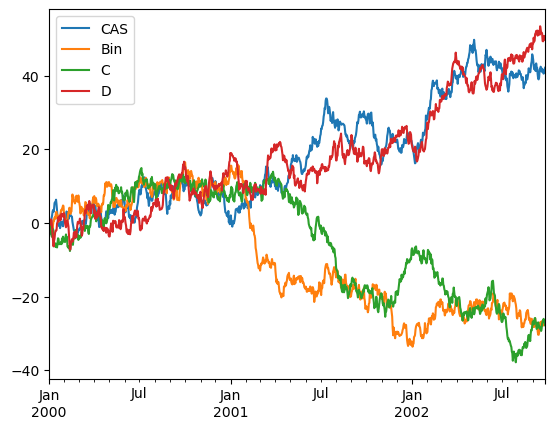

In [12]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['CAS','Bin','C','D'])
df_cumsum = df.cumsum()
plt.figure()
df_cumsum.plot()
plt.show()

### 2. Plot histograms (frequency plots)

For this we use our Iris dataset.

In [17]:
#filepath = '/content/drive/MyDrive/CAS/CAS-ADS-2021/iris.csv' # adapt this to your path
#df = pd.read_csv(filepath,names=['slength','swidth','plength','pwidth','species']) # data type is a string (str), i.e. not converted into numbers
#df.head() # print first 5 lines of data
import pandas as pd
url = 'https://raw.githubusercontent.com/sigvehaug/CAS-Applied-Data-Science/master/Module-1/iris.csv'
df=pd.read_csv(url,names=['slength','swidth','plenght','pwidth','species'])
df.head()

,slength,swidth,plenght,pwidth,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Plot two histograms with a legend in the same graph.

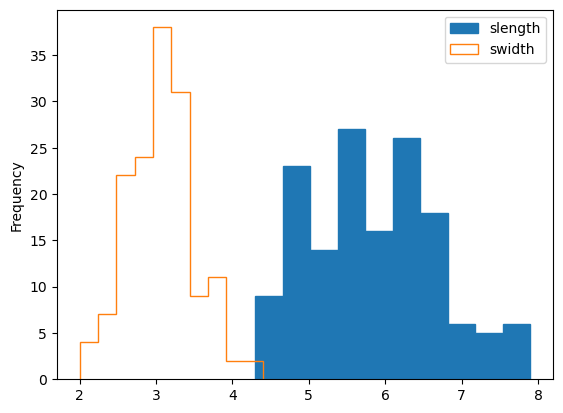

In [18]:
df['slength'].plot(kind="hist",fill=True,histtype='step',label='slength')
df['swidth'].plot(kind="hist",fill=False,histtype='step',label='swidth')
plt.legend()
plt.show()

### The effect of binning

When data is binned (or sampled) the bin size effects the amount of counts in each bin. Counts fluctuate like a normal distribution for counts above about 20. So depending on your bin size, the same data may look differently.

Hard binning (small bin size) may introduce pure statistical structures without any other meaning. This is then overfitting. Too big bin sizes may wipe out structures in the data (underfitting). If known, a bin size guided by the physical resolution of the sensor is close to optimal. 

Plot the same histograms with a different binning. 

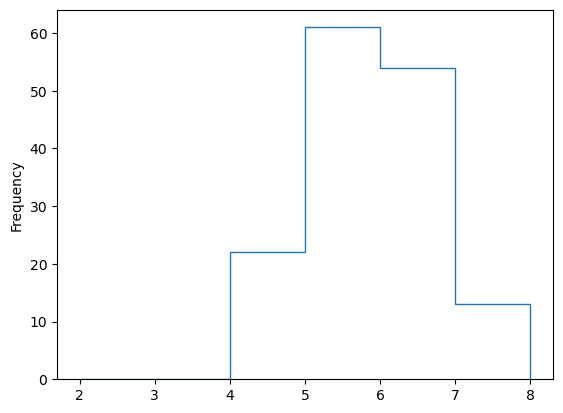

In [21]:
df['slength'].plot(bins=6,range=(2,8), kind="hist",fill=False,histtype='step')
plt.show()

### Always label the axes (also with units)

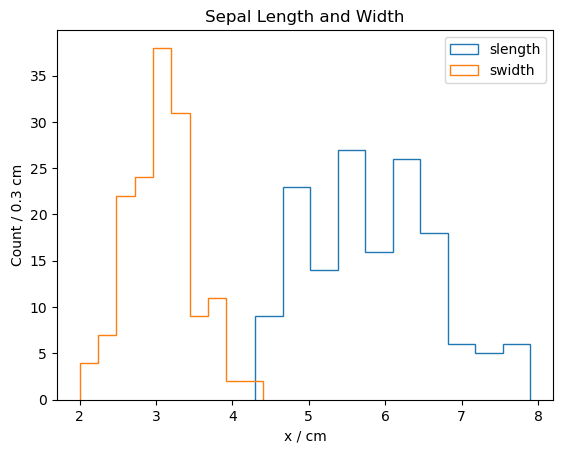

In [22]:
ax = df['slength'].plot(kind="hist",fill=False,histtype='step',label='slength')
df['swidth'].plot(kind="hist",fill=False,histtype='step',label='swidth')
ax.set_xlabel('x / cm')
ax.set_ylabel('Count / 0.3 cm')
ax.set_title('Sepal Length and Width')
plt.legend()
plt.show()

In [23]:
s_df = df[df['species']=='Iris-setosa']

### 3. Scatter plots

Scatter plots show how the data is distributed in two dimensions. They are good for finding (anti) correlations between two variables. We plot several plots in one figure.

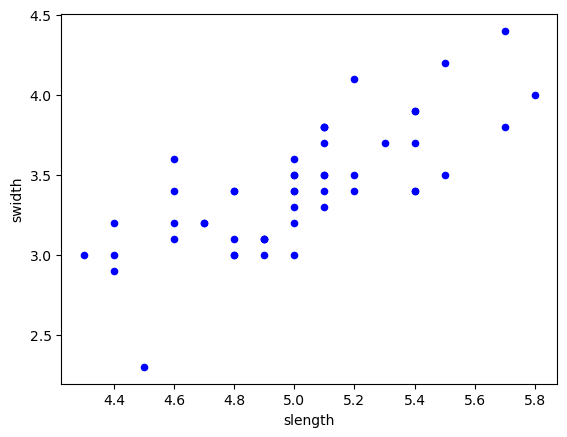

In [26]:
s_df.plot(x='slength',y='swidth',kind="scatter",c='b')
plt.show()

With the plotting module there are some nice tools. For example authomatic plotting of all scatter plots.

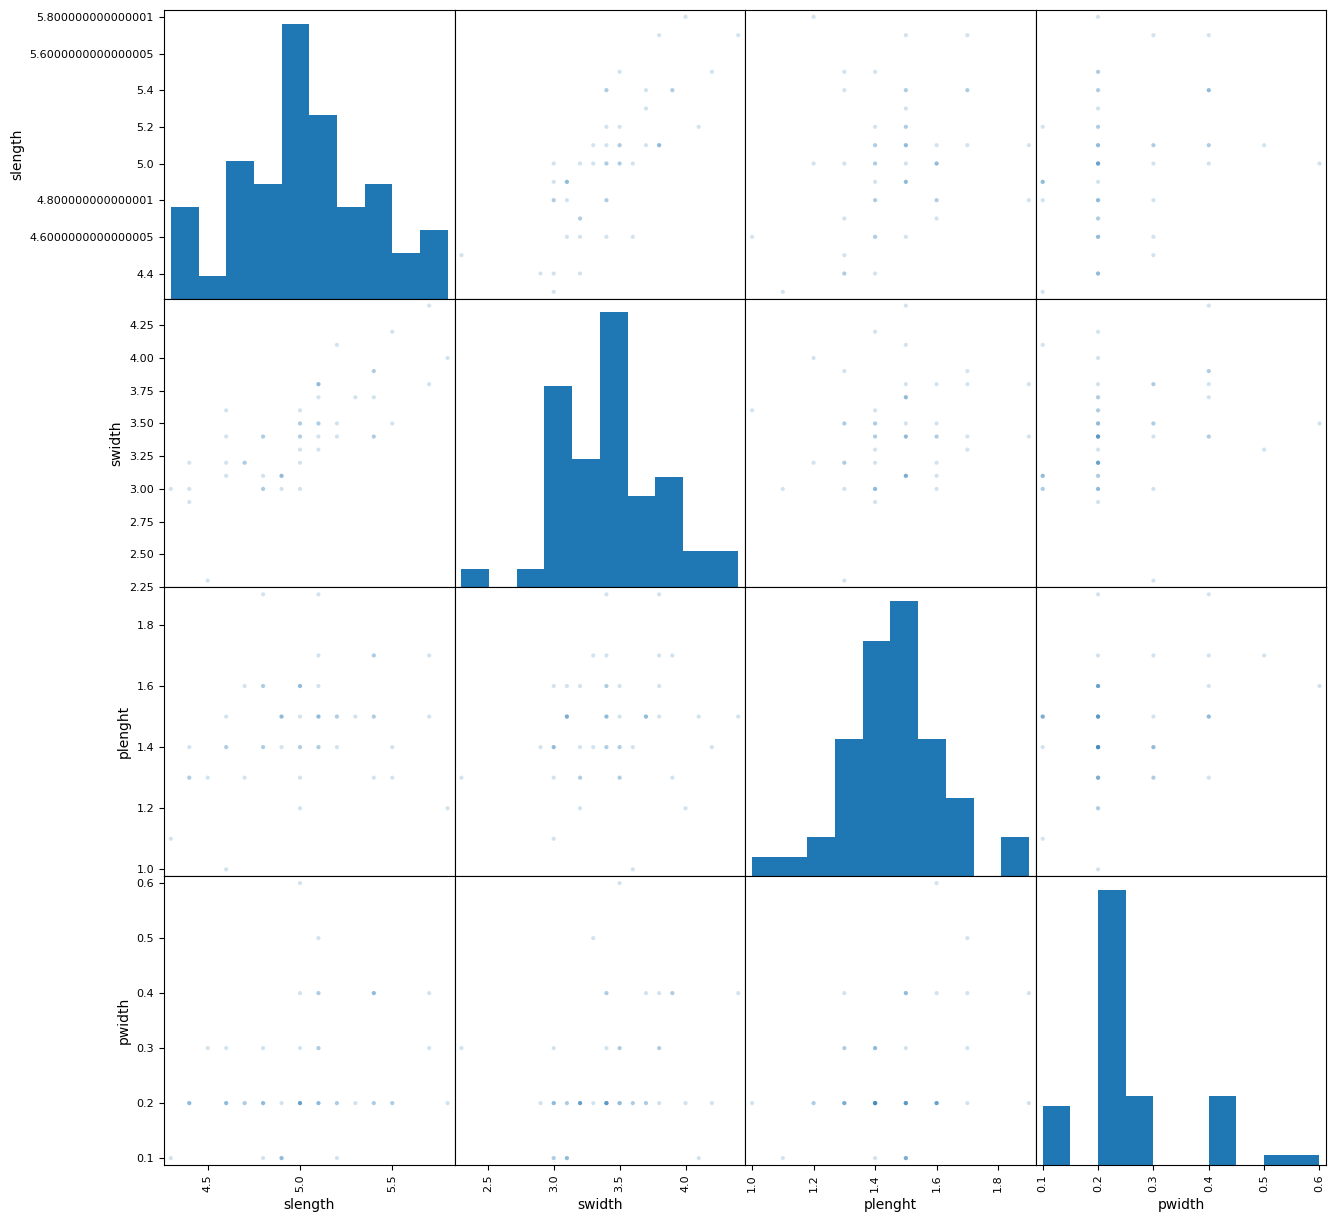

In [29]:
from pandas.plotting import scatter_matrix #makes all the posible correlations
scatter_matrix(df[df['species']=='Iris-setosa'], alpha=0.2, figsize=(15, 15), diagonal='hist') #add histogram plot in the diagonal
plt.show()

Or plotting of Andrew curves. https://en.wikipedia.org/wiki/Andrews_plot

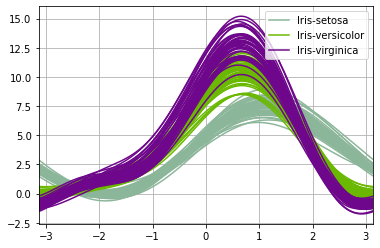

In [ ]:
from pandas.plotting import andrews_curves
andrews_curves(df, 'species')
plt.show()

There are several other tools too. See https://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4. Box plots

Boxplot can be drawn calling Series.plot.box() and DataFrame.plot.box(), or DataFrame.boxplot() to visualize the distribution of values within each column.

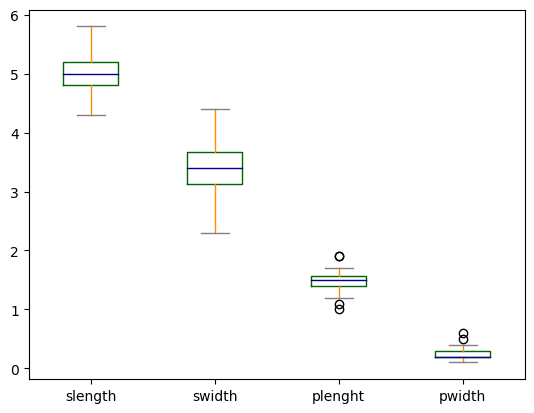

In [31]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',
             medians='DarkBlue', caps='Gray')
s_df.plot.box(color=color)
#df.plot.box(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')
plt.show()

Box plots are non-parametric. The box shows the first second and third quartiles. The whiskers may be standard deviations or other percentiles.

### 5. Plotting with error bars

There is no science without error bars, or better, uncertainties. The meaning of uncertainties is discussed in module 2. Here we only show by example  how to plot uncertainties.

Plotting with error bars is supported in DataFrame.plot() and Series.plot().

Horizontal and vertical error bars can be supplied to the xerr and yerr keyword arguments to plot(). The error values can be specified using a variety of formats:

- As a DataFrame or dict of errors with column names matching the columns attribute of the plotting DataFrame or matching the name attribute of the Series.
- As a str indicating which of the columns of plotting DataFrame contain the error values.
- As raw values (list, tuple, or np.ndarray). Must be the same length as the plotting DataFrame/Series.

Asymmetrical error bars are also supported, however raw error values must be provided in this case. For a M length Series, a Mx2 array should be provided indicating lower and upper (or left and right) errors. For a MxN DataFrame, asymmetrical errors should be in a Mx2xN array.

Here is an example using an error dataframe (symmetric uncertainties).

    0
0   6
1  15
2   4
3  20
4  16
5  13


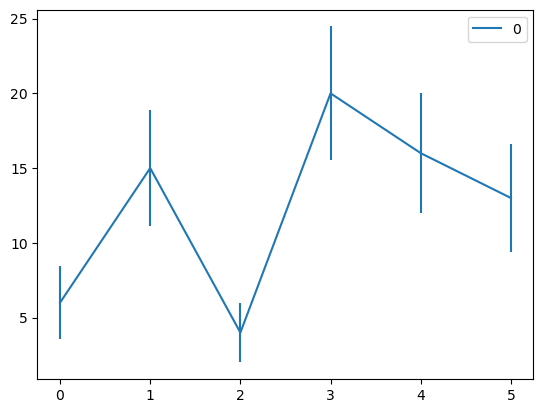

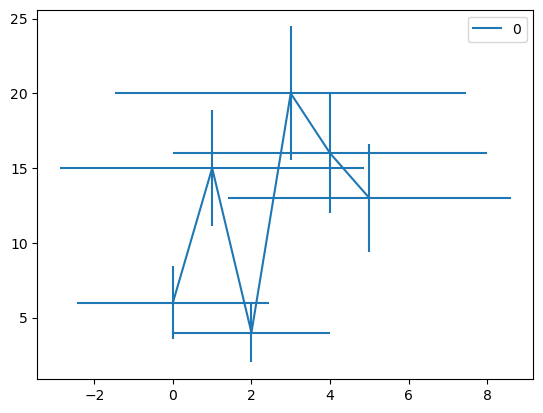

In [35]:
my_df   = pd.DataFrame([6,15,4,20,16,13]) # Some random data
print(my_df)
my_df_e = (my_df)**0.5 # The error dataframe
my_df.plot(yerr=my_df_e) # it add error to the points
plt.show()

my_df.plot(xerr=my_df_e, yerr=my_df_e) # it add errors also to the x axis...just to show because it makes no sense
plt.show()

### 6. Formatting plots 

Plots can easily be formatted with keywords. One can adjust colors, types of shading, lines, axes, legends, titles, etc. Some formatting has been exemplified above. More examples are in the documentation. https://pandas.pydata.org/pandas-docs/stable/visualization.html

With the matplotlib module you are even more flexible. See https://matplotlib.org/gallery/index.html for inspirations.

### 7. Summary

- Do you remember three important plot types?
- What can the binning of a histogram do to the interpretation of it?
- What are the three parts of the general communication process?
- Can you mention three important points to include in plots and their figure legends?


### 8 Plotting Geodata

Often is very nice to visualise data on geographical maps. Fortunately people have written packages helpin us with that. This is an example how the geopandas package can be used. 

You need to install geopandas (if you use Anaconda, the Anaconda Navigator in the environment you are using. Geopandas is part repository/channel conda-forge). This you may do at home or now or just follow Sigve showing you this example on colab. 

First we need some data files. On Linux (colab is running linux) or MacOs you can do this in order to have the files in a subfolder data of your current notebook folder:


In [36]:
! wget http://biogeo.ucdavis.edu/data/diva/adm/CHE_adm.zip 
! mkdir -p data 
! unzip CHE_adm.zip -d data 
#! cd data 
#! unzip CHE_adm.zip

--2023-08-24 14:55:09--  http://biogeo.ucdavis.edu/data/diva/adm/CHE_adm.zip
Resolving biogeo.ucdavis.edu (biogeo.ucdavis.edu)... 128.120.228.172
Connecting to biogeo.ucdavis.edu (biogeo.ucdavis.edu)|128.120.228.172|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://biogeo.ucdavis.edu/data/diva/adm/CHE_adm.zip [following]
--2023-08-24 14:55:10--  https://biogeo.ucdavis.edu/data/diva/adm/CHE_adm.zip
Connecting to biogeo.ucdavis.edu (biogeo.ucdavis.edu)|128.120.228.172|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.biogeo.ucdavis.edu/data/diva/adm/CHE_adm.zip [following]
--2023-08-24 14:55:11--  https://data.biogeo.ucdavis.edu/data/diva/adm/CHE_adm.zip
Resolving data.biogeo.ucdavis.edu (data.biogeo.ucdavis.edu)... 128.120.228.172
Connecting to data.biogeo.ucdavis.edu (data.biogeo.ucdavis.edu)|128.120.228.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3559904 (3.4M) [application/

In [43]:
!pip install geopandas


# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.6/18.6 MB 15.8 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 25.7 MB/s eta 0:00:0000:0100:01
The operation couldn’t be completed. Unable to locate a Java Runtime that supports apt.
Please visit http://www.java.com for information on installing Java.

The operation couldn’t be completed. Unable to locate a Java Runtime that supports apt.
Please visit http://www.java.com for information on installing Java.

  Cloning git://github.com/geopandas/geopandas.git to /private/var/folders/07/cmbl5t2576sckxlm_hl6tw1c0000gn/T/pip-req-build-pmk_r06h
  Running command git clone --filter=blob:none --quiet git://github.com/geopandas/geopandas.git /private/var/folders/07/cmbl5t2576sckxlm_hl6tw1c0000gn/T/pip-req-build-pmk_r06h
  fatal: unable to

In [37]:

! ls -l data/

total 23160
-rw-r--r--@ 1 paula  staff        5 Aug 11  2015 CHE_adm0.cpg
-rw-r--r--@ 1 paula  staff     1284 Aug 11  2015 CHE_adm0.csv
-rw-r--r--@ 1 paula  staff     5685 Aug 11  2015 CHE_adm0.dbf
-rw-r--r--@ 1 paula  staff      145 Aug 11  2015 CHE_adm0.prj
-rw-r--r--@ 1 paula  staff   208876 Aug 11  2015 CHE_adm0.shp
-rw-r--r--@ 1 paula  staff      108 Aug 11  2015 CHE_adm0.shx
-rw-r--r--@ 1 paula  staff        5 Aug 11  2015 CHE_adm1.cpg
-rw-r--r--@ 1 paula  staff     3131 Aug 11  2015 CHE_adm1.csv
-rw-r--r--@ 1 paula  staff    12646 Aug 11  2015 CHE_adm1.dbf
-rw-r--r--@ 1 paula  staff      145 Aug 11  2015 CHE_adm1.prj
-rw-r--r--@ 1 paula  staff   781896 Aug 11  2015 CHE_adm1.shp
-rw-r--r--@ 1 paula  staff      308 Aug 11  2015 CHE_adm1.shx
-rw-r--r--@ 1 paula  staff        5 Aug 11  2015 CHE_adm2.cpg
-rw-r--r--@ 1 paula  staff    14495 Aug 11  2015 CHE_adm2.csv
-rw-r--r--@ 1 paula  staff    99082 Aug 11  2015 CHE_adm2.dbf
-rw-r--r--@ 1 paula  staff      145 Aug 11  2015 CHE_adm2.

In [46]:

import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import datetime
import os


In [44]:
#! ls -l drive/MyDrive/CAS/CAS-ADS-2021/cantons.csv 

ls: drive/MyDrive/CAS/CAS-ADS-2021/cantons.csv: No such file or directory


In [51]:
fp = "data/CHE_adm1.shp"
map_df = gpd.read_file(fp)
map_df
cantons_df = pd.read_csv("M1-D2-DB/cantons.csv") 
cantons_df
merged_df = map_df.merge(cantons_df, how="left", left_on="NAME_1", right_on="CANTON")
merged_df

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,CANTON,ACR,INHABITANTS,VIRUSCASESCONFIRMED
0,223,CHE,Switzerland,1,Aargau,Canton|Kanton|Chantun,Canton,NaN,Argovia|Arg¢via|Argovie,"POLYGON ((8.22503 47.61147, 8.22661 47.61130, ...",Aargau,AG,677387,26
1,223,CHE,Switzerland,2,Appenzell Ausserrhoden,Canton|Kanton|Chantun,Canton,NaN,Appenzell Ausser-Rhoden|Appenzell Outer Rhodes...,"POLYGON ((9.54239 47.47059, 9.54387 47.47031, ...",Appenzell Ausserrhoden,AR,55234,3
2,223,CHE,Switzerland,3,Appenzell Innerrhoden,Canton|Kanton|Chantun,Canton,NaN,Appenzell Inner-Rhoden|Appenzell Inner Rhodes|...,"MULTIPOLYGON (((9.37930 47.38512, 9.37944 47.3...",Appenzell Innerrhoden,AI,16145,0
3,223,CHE,Switzerland,4,Basel-Landschaft,Canton|Kanton|Chantun,Canton,NaN,Bâle-Campagne|Basel-Country|Baselland|Basel-La...,"MULTIPOLYGON (((7.38339 47.41924, 7.38057 47.4...",Basel-Landschaft,BL,288132,41
4,223,CHE,Switzerland,5,Basel-Stadt,Canton|Kanton|Chantun,Canton,NaN,Bâle-Ville|Basel-City|Basel-Town|Basilea-Citad...,"POLYGON ((7.67336 47.58182, 7.67500 47.57977, ...",Basel-Stadt,BS,194766,100
5,223,CHE,Switzerland,6,Bern,Canton|Kanton|Chantun,Canton,NaN,Berna|Berne,"MULTIPOLYGON (((7.09284 46.89419, 7.09202 46.8...",Bern,BE,1034977,69
6,223,CHE,Switzerland,7,Fribourg,Canton|Kanton|Chantun,Canton,NaN,Freiburg|Friburg|Friburgo,"MULTIPOLYGON (((6.78581 46.74974, 6.78684 46.7...",Fribourg,FR,318714,31
7,223,CHE,Switzerland,8,Genève,Canton|Kanton|Chantun,Canton,NaN,Cenevre|Genebra|Geneve|Geneva|Genevra|Genf|Gin...,"MULTIPOLYGON (((6.18406 46.34775, 6.18559 46.3...",Genève,GE,499480,103
8,223,CHE,Switzerland,9,Glarus,Canton|Kanton|Chantun,Canton,NaN,Glaris|Glarona|Glaruna,"POLYGON ((9.07083 47.13050, 9.07307 47.12995, ...",Glarus,GL,40403,3
9,223,CHE,Switzerland,10,Graubünden,Canton|Kanton|Chantun,Canton,NaN,Graubünden|Grigioni|Grischun|Grisons,"MULTIPOLYGON (((10.22766 46.61207, 10.22734 46...",Graubünden,GR,198379,43


# End of the prepared data visualisation examples. 

Feel free to play on your own. You should make some good plots of your dataset for the project report.

   ACR  VIRUSCASESDENSITY
0   AG           0.003838
1   AR           0.005431
2   AI           0.000000
3   BL           0.014230
4   BS           0.051344
5   BE           0.006667
6   FR           0.009727
7   GE           0.020621
8   GL           0.007425
9   GR           0.021676
10  JU           0.009534
11  LU           0.002197
12  NE           0.021487
13  NW           0.000000
14  OW           0.002643
15  SG           0.003151
16  SH           0.001220
17  SZ           0.007539
18  SO           0.002196
19  TG           0.001447
20  TI           0.070753
21  UR           0.000000
22  VS           0.012502
23  VD           0.031784
24  ZH           0.007824
25  ZG           0.006307


TypeError: annotate() missing 1 required positional argument: 'text'

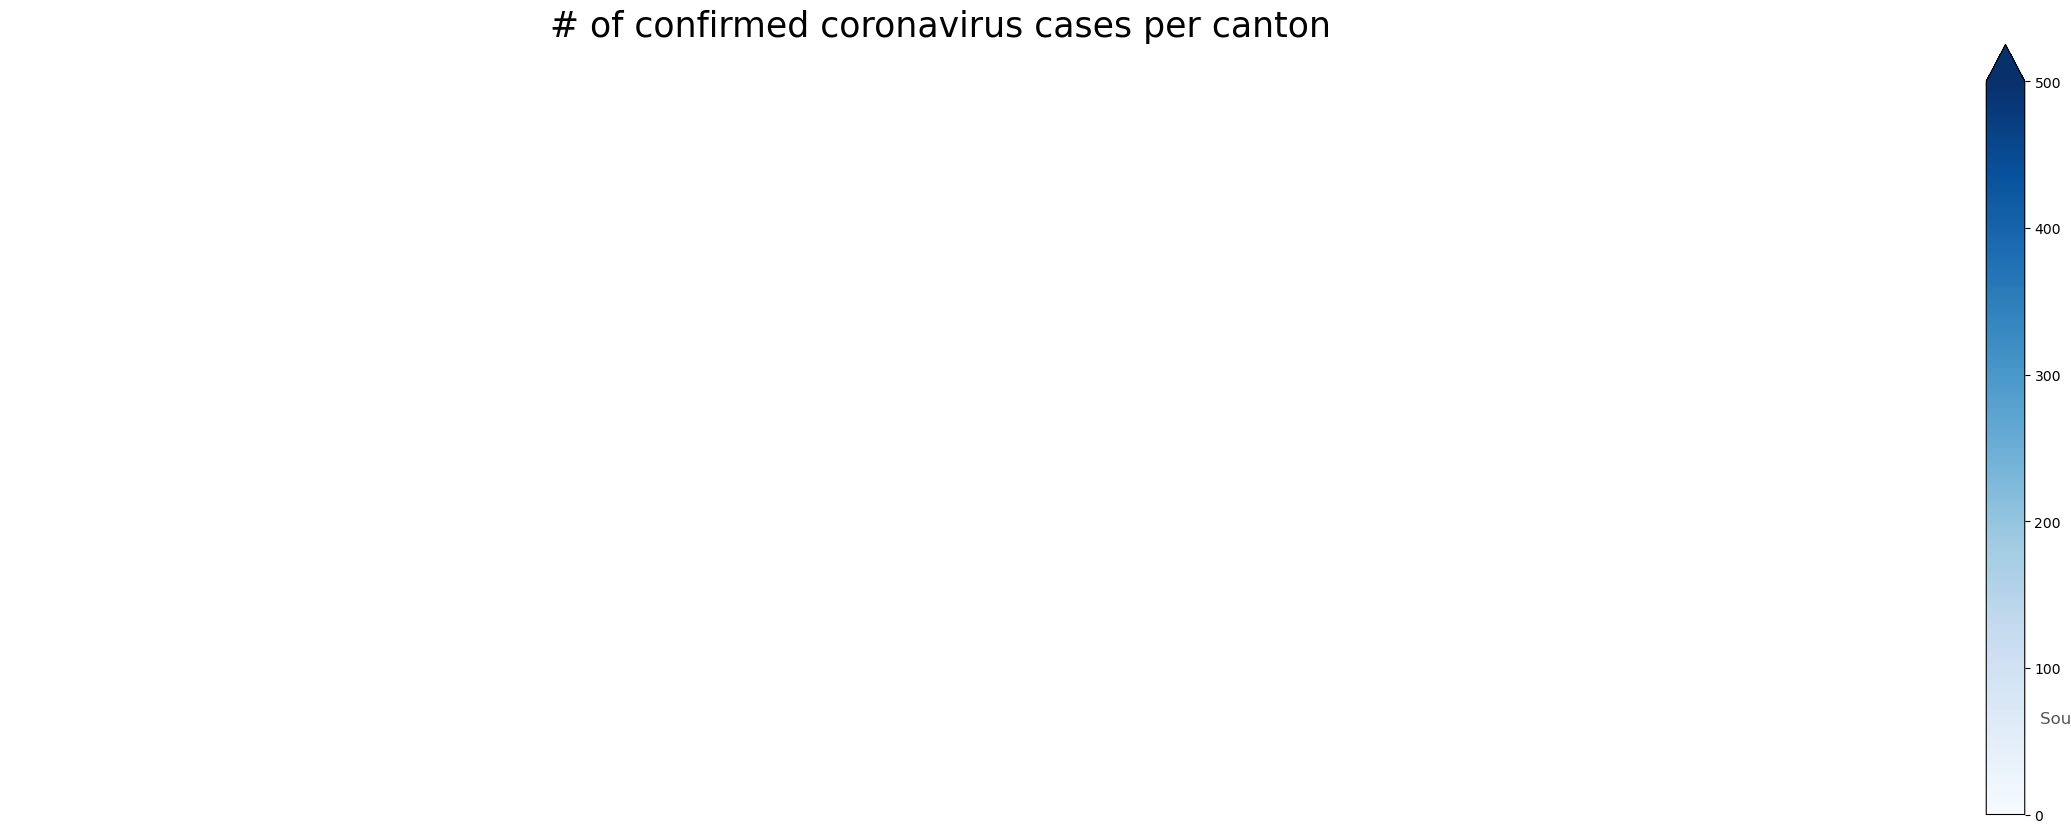

   ACR  VIRUSCASESCONFIRMED
0   AG                   26
1   AR                    3
2   AI                    0
3   BL                   41
4   BS                  100
5   BE                   69
6   FR                   31
7   GE                  103
8   GL                    3
9   GR                   43
10  JU                    7
11  LU                    9
12  NE                   38
13  NW                    0
14  OW                    1
15  SG                   16
16  SH                    1
17  SZ                   12
18  SO                    6
19  TG                    4
20  TI                  250
21  UR                    0
22  VS                   43
23  VD                  254
24  ZH                  119
25  ZG                    8


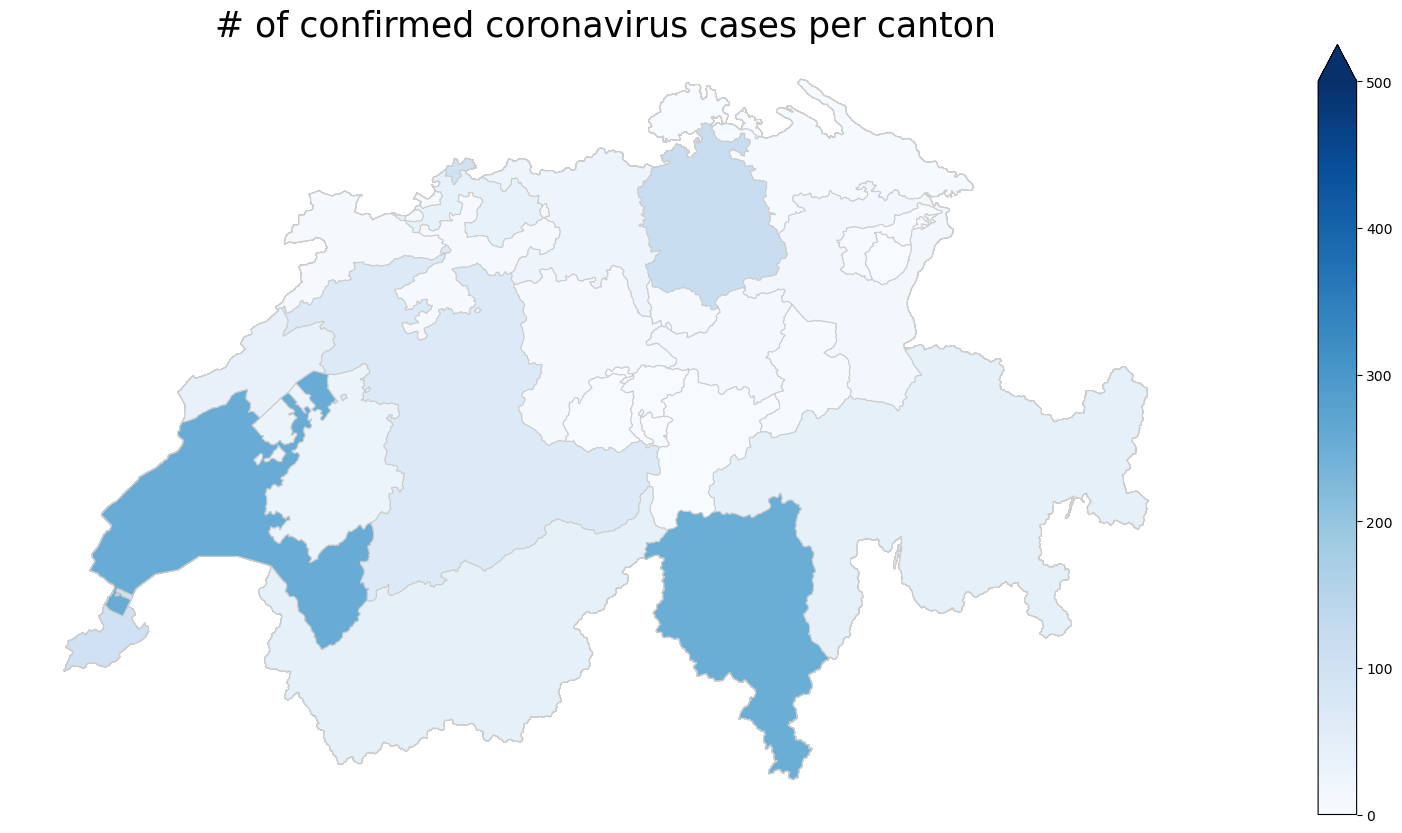

In [60]:
def plotmap(df, datacol, vmax, filename, title):
    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=vmax))
    fig, ax = plt.subplots(1, figsize=(30, 10))
    ax.axis("off")
    ax.set_title(title, fontdict={'fontsize': '25', 'fontweight' : '3'})
    ax.annotate("Sources: BAG, WP, ZHAW SPLab", xy=(0.68, 0.11),
    xycoords='figure fraction', fontsize=12, color='#555555')
    sm.set_array([])
    fig.colorbar(sm, ax=ax, extend="max")
    df['coords'] = df['geometry'].apply(lambda x: x.representative_point().coords[:])
    df['coords'] = [coords[0] for coords in df['coords']]
    for idx, row in df.iterrows():
        #plt.annotate(s=row['NAME_0'], xy=row['coords'],horizontalalignment='center')
        df.plot(column=datacol, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', vmax=vmax)
    fig.savefig(filename, dpi=150)

print(merged_df[["ACR", "VIRUSCASESCONFIRMED"]])
plotmap(merged_df, "VIRUSCASESCONFIRMED", 500, "map_absolute.png", "# of confirmed coronavirus cases per canton")

# If you want file names with day information, use code below
#os.makedirs("dailymaps", exist_ok=True)
#stamp = datetime.datetime.now().strftime("%Y%m%d")
#hdate = datetime.datetime.now().strftime("%d.%m.%Y")
#plotmap(merged_df, "VIRUSCASESCONFIRMED", 500, f"dailymaps/map_abs_{stamp}.png", f"# of confirmed coronavirus cases per canton [{hdate}]")


Chat GTP explanation of the code
This code defines a Python function called plotmap and then uses it to create a map plot using Matplotlib and GeoPandas. Let's break down the code step by step:

    def plotmap(df, datacol, vmax, filename, title):
    This line defines a function named plotmap that takes five parameters:
        df: A GeoPandas DataFrame containing geographical data.
        datacol: The name of the column in the DataFrame that you want to use for coloring the map.
        vmax: The maximum value for the color scale.
        filename: The name of the file where the map plot will be saved.
        title: The title for the map plot.

    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=vmax))
    This line creates a ScalarMappable object sm with a colormap set to 'Blues' and a normalization range from 0 to vmax. This object will be used for color mapping.

    fig, ax = plt.subplots(1, figsize=(30, 10))
    This line creates a Matplotlib figure fig and axis ax for plotting. The figure size is set to (30, 10).

    ax.axis("off")
    This turns off the axis labels and ticks, making the plot look like a map without axes.

    ax.set_title(title, fontdict={'fontsize': '25', 'fontweight' : '3'})
    This sets the title of the plot using the specified title and customizes the title's appearance by setting the font size and font weight.

    ax.annotate("Sources: BAG, WP, ZHAW SPLab", xy=(0.68, 0.11), xycoords='figure fraction', fontsize=12, color='#555555')
    This adds an annotation to the plot indicating the data sources. It specifies the text, position (xy), coordinates are given in figure fraction, font size, and text color.

    sm.set_array([])
    This line sets the array of the ScalarMappable object to an empty list. This step is necessary for creating a colorbar.

    fig.colorbar(sm, ax=ax, extend="max")
    This adds a colorbar to the plot using the ScalarMappable object sm. The colorbar is attached to the specified axis ax and extends to the maximum value in the colormap.

    df['coords'] = df['geometry'].apply(lambda x: x.representative_point().coords[:])
    This line calculates the representative point for each geometry in the GeoPandas DataFrame and stores the coordinates of these points in a new column called 'coords'.

    df['coords'] = [coords[0] for coords in df['coords']]
    This line extracts the first element (x, y coordinates) from the 'coords' column and stores it back in the same column.

    for idx, row in df.iterrows():
    This loop iterates over the rows in the GeoPandas DataFrame df.

    df.plot(column=datacol, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', vmax=vmax)
    This line plots the GeoPandas DataFrame on the specified axis ax. It uses the values from the 'VIRUSCASESCONFIRMED' column (or any specified column in datacol) to color the map using the 'Blues' colormap. Other plot attributes like linewidth, edgecolor, and vmax are also set.

    fig.savefig(filename, dpi=150)
    This saves the generated map as an image file with the specified filename and a resolution of 150 dots per inch (dpi).

Finally, after defining the plotmap function, it is called with the merged_df DataFrame and specific parameters to create a map plot showing the number of confirmed coronavirus cases per canton, and the resulting map is saved as "map_absolute.png".
Free Research Preview. ChatGPT may produce inaccurate information about people, places, or facts. ChatGPT August 3 Version

